<a href="https://colab.research.google.com/github/thebackbencher666/IMDB-movies-ML/blob/main/ML_project_in_IMDB_movies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv("/imdb_top_1000.csv") #load dataset

#show basic info
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB
None


,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [ ]:
df.columns  # Explore column names

# Preview relevant columns
df[['Series_Title', 'Released_Year', 'IMDB_Rating', 'No_of_Votes']].head()


,Series_Title,Released_Year,IMDB_Rating,No_of_Votes
0,The Shawshank Redemption,1994,9.3,2343110
1,The Godfather,1972,9.2,1620367
2,The Dark Knight,2008,9.0,2303232
3,The Godfather: Part II,1974,9.0,1129952
4,12 Angry Men,1957,9.0,689845


In [ ]:
# Drop rows with missing values in relevant columns
df_clean = df[['Series_Title', 'Released_Year', 'IMDB_Rating', 'No_of_Votes']].dropna()

# Convert types
df_clean['Released_Year'] = pd.to_numeric(df_clean['Released_Year'], errors='coerce')
df_clean = df_clean.dropna()

df_clean['Released_Year'] = df_clean['Released_Year'].astype(int)
df_clean['No_of_Votes'] = df_clean['No_of_Votes'].astype(str).str.replace(',', '').astype(int)


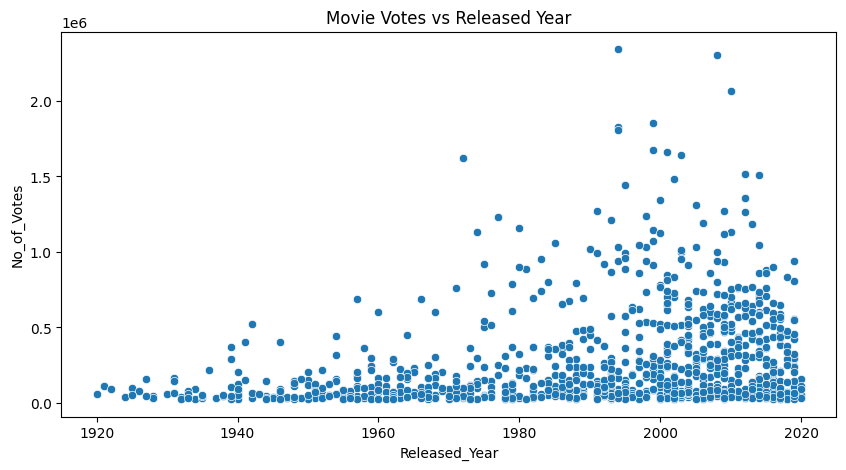

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.scatterplot(data=df_clean, x='Released_Year', y='No_of_Votes')
plt.title('Movie Votes vs Released Year')
plt.show()


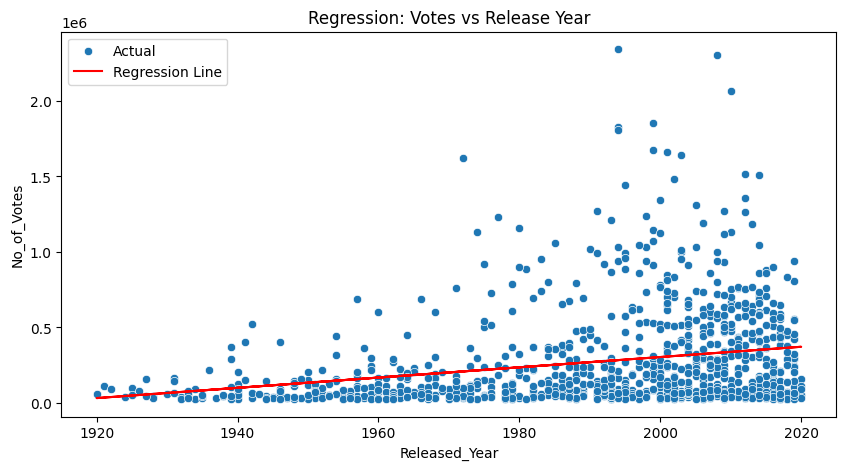

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Reshape features for sklearn
X = df_clean['Released_Year'].values.reshape(-1, 1)
y = df_clean['No_of_Votes'].values

# Create and fit model
model = LinearRegression()
model.fit(X, y)

# Predict
y_pred = model.predict(X)

# Plot regression
plt.figure(figsize=(10,5))
sns.scatterplot(x=df_clean['Released_Year'], y=df_clean['No_of_Votes'], label='Actual')
plt.plot(df_clean['Released_Year'], y_pred, color='red', label='Regression Line')
plt.legend()
plt.title('Regression: Votes vs Release Year')
plt.show()


In [ ]:
print("Coefficient (slope):", model.coef_[0])
print("Intercept:", model.intercept_)
print("R² Score:", model.score(X, y))


Coefficient (slope): 3399.2914960328562
Intercept: -6495030.341829284
R² Score: 0.0584598834840766


In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv('/imdb_top_1000.csv')

# Keep necessary columns
df = df[['Series_Title', 'Released_Year', 'No_of_Votes']].dropna()

# Clean and convert types
df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')
df = df.dropna(subset=['Released_Year', 'No_of_Votes'])

df['Released_Year'] = df['Released_Year'].astype(int)
df['No_of_Votes'] = df['No_of_Votes'].astype(str).str.replace(',', '').astype(int)

# Get most famous movie (by votes) for each year
most_famous_by_year = df.loc[df.groupby('Released_Year')['No_of_Votes'].idxmax()]

# Sort by year
most_famous_by_year = most_famous_by_year.sort_values(by='Released_Year').reset_index(drop=True)

# Rename columns for clarity
most_famous_by_year.rename(columns={
    'Series_Title': 'Movie Title',
    'Released_Year': 'Release Year',
    'No_of_Votes': 'Number of Votes',
    'IMDB_Rating': 'IMDb Rating'
}, inplace=True)

# Display result
print(most_famous_by_year)





                     Movie Title  Release Year  Number of Votes
0   Das Cabinet des Dr. Caligari          1920            57428
1                        The Kid          1921           113314
2                      Nosferatu          1922            88794
3                   Sherlock Jr.          1924            41985
4                  The Gold Rush          1925           101053
..                           ...           ...              ...
94                      Deadpool          2016           902669
95                         Logan          2017           647884
96        Avengers: Infinity War          2018           834477
97                         Joker          2019           939252
98                          Soul          2020           159171

[99 rows x 3 columns]


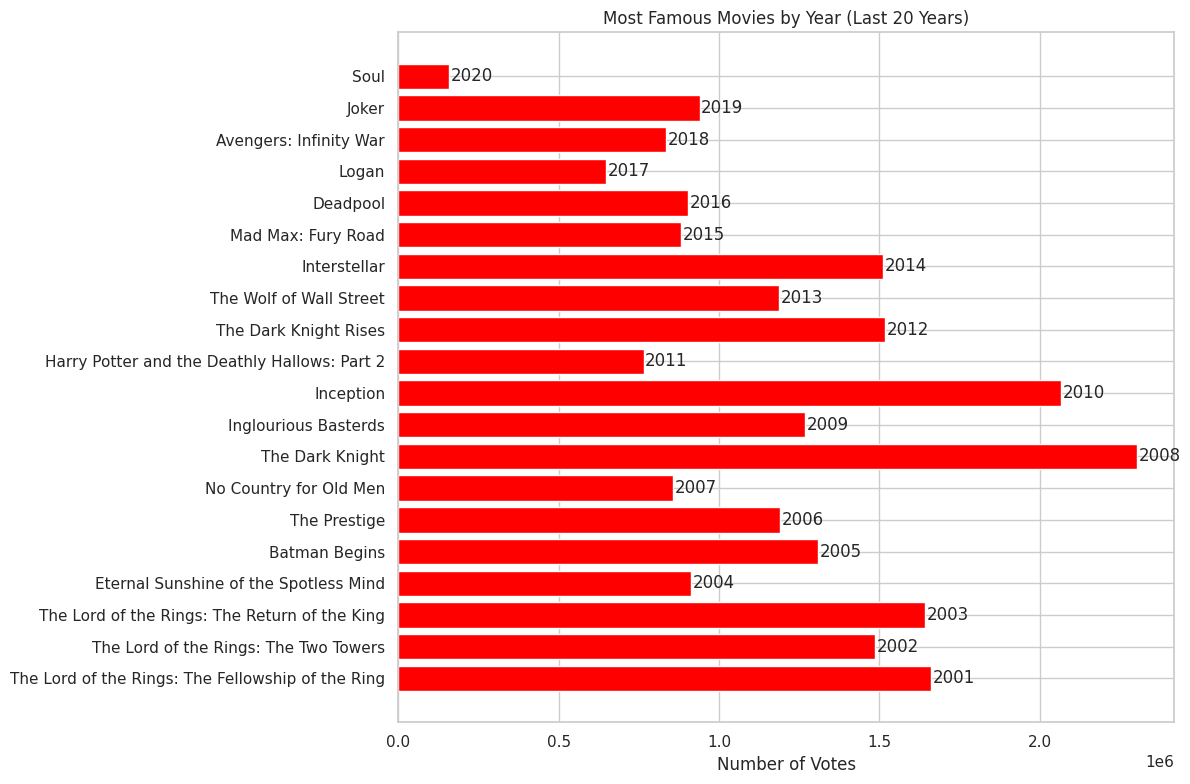

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select recent 20 years
recent = most_famous_by_year.sort_values(by='Release Year', ascending=False).head(20)

# Plot setup
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Horizontal bar plot
bars = plt.barh(
    recent['Movie Title'],
    recent['Number of Votes'],
    color='red'
)

# Add labels (only release year)
for bar, year in zip(bars, recent['Release Year']):
    plt.text(
        bar.get_width() + 5000,
        bar.get_y() + bar.get_height() / 2,
        f'{year}',
        va='center'
    )

# Final plot touches
plt.xlabel('Number of Votes')
plt.title('Most Famous Movies by Year (Last 20 Years)')
plt.gca().invert_yaxis()  # Highest year on top
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

original_df = pd.read_csv('/imdb_top_1000.csv')
print(original_df.columns.tolist())



['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate', 'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director', 'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross']


In [ ]:
df = original_df[['Series_Title', 'Released_Year', 'No_of_Votes', 'IMDB_Rating', 'Genre']].dropna()

# Clean types
df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')
df = df.dropna(subset=['Released_Year', 'No_of_Votes'])
df['Released_Year'] = df['Released_Year'].astype(int)
df['No_of_Votes'] = df['No_of_Votes'].astype(str).str.replace(',', '').astype(int)

# Most famous movie per year
most_famous_by_year = df.loc[df.groupby('Released_Year')['No_of_Votes'].idxmax()]
most_famous_by_year.rename(columns={
    'Series_Title': 'Movie Title',
    'Released_Year': 'Release Year',
    'No_of_Votes': 'Number of Votes',
    'IMDB_Rating': 'IMDb Rating'
}, inplace=True)


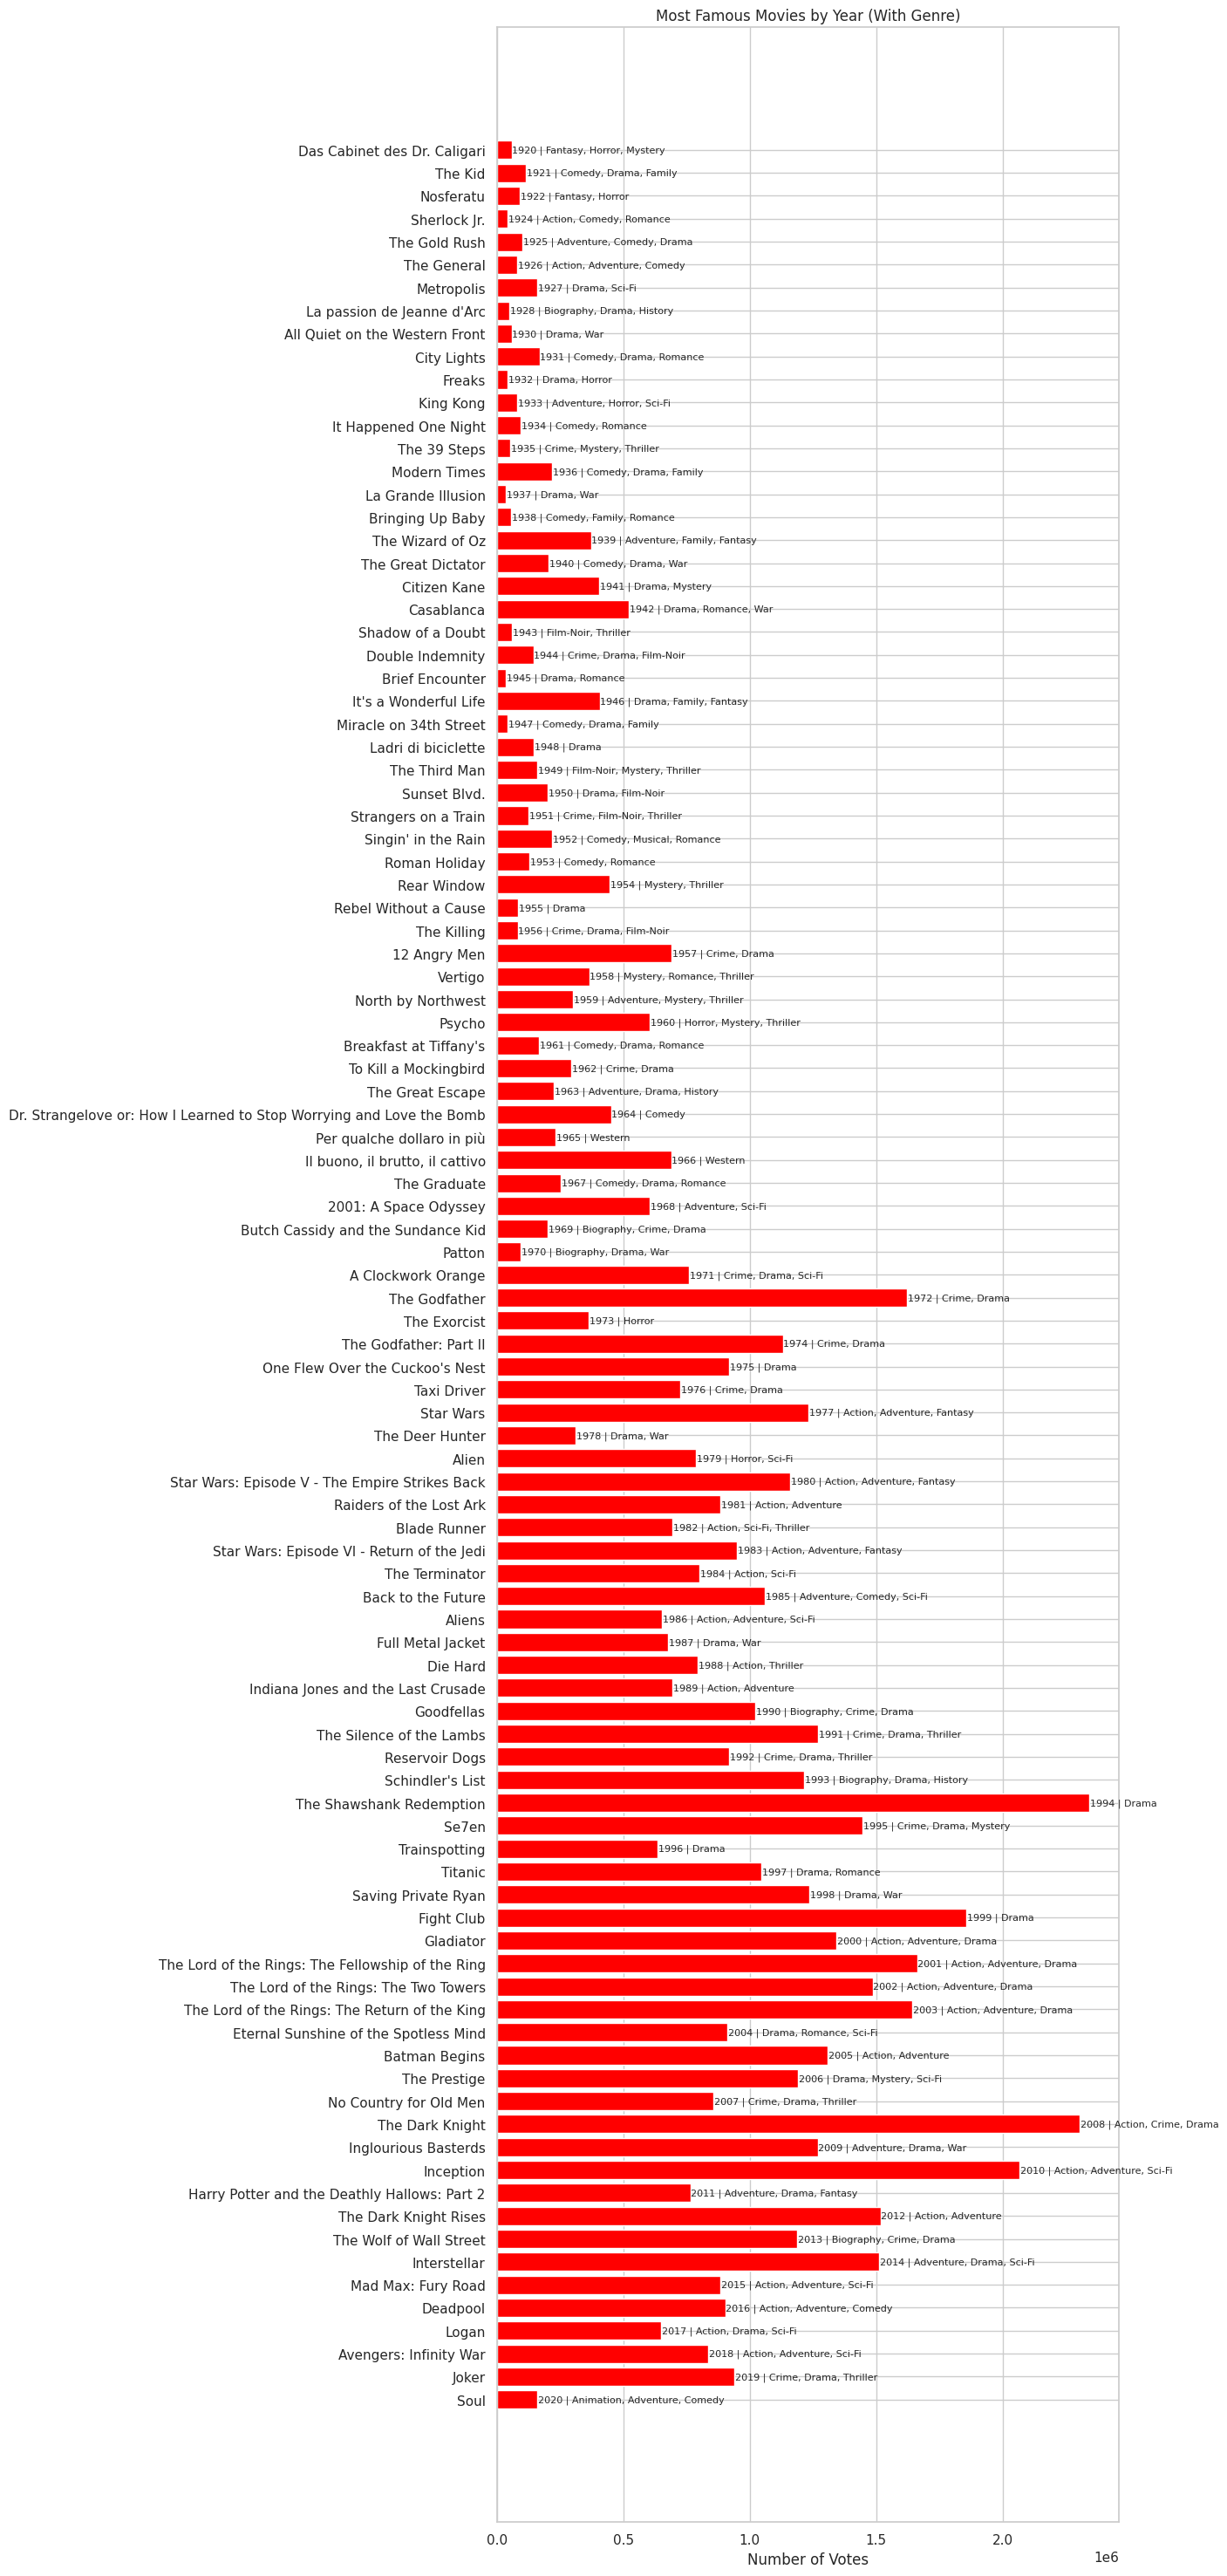

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort chronologically
full_data = most_famous_by_year.sort_values(by='Release Year')

plt.figure(figsize=(14, max(8, len(full_data) * 0.3)))
sns.set(style="whitegrid")

bars = plt.barh(
    full_data['Movie Title'],
    full_data['Number of Votes'],
    color='red'
)

# Show release year + genre in the label
for bar, year, genre in zip(bars, full_data['Release Year'], full_data['Genre']):
    plt.text(
        bar.get_width() + 3000,
        bar.get_y() + bar.get_height() / 2,
        f'{year} | {genre}',
        va='center',
        fontsize=8
    )

plt.xlabel('Number of Votes')
plt.title('Most Famous Movies by Year (With Genre)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
